In [51]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
def get_people_with_disease(df, both_diseased_column,disease_code_pattern):
    people_with_disease_df = df[both_diseased_column.str.contains(disease_code_pattern)]

    return people_with_disease_df

In [4]:
def get_people_with_2_diseases(df, first_disease_code_pattern, second_disease_code_pattern):
    people_with_disease_df = df[df['41202-0.0'].str.contains(first_disease_code_pattern) & df['41204-0.0'].str.contains(second_disease_code_pattern)]
    people_with_disease_df = pd.concat([people_with_disease_df, df[df['41204-0.0'].str.contains(first_disease_code_pattern) & df['41202-0.0'].str.contains(second_disease_code_pattern)]])

    return people_with_disease_df

In [6]:
biobank_path = '/home/ofeksh2@mta.ac.il/biobank/ukb672220.csv'
fields = ['eid', '41202-0.0', '41204-0.0']

In [5]:
def label_patients(both_diseased_column, df_first_disease_code_pattern, second_disease_code_pattern):
    labels = df.apply(lambda x: 1 if )
    return labels

SyntaxError: invalid syntax (2048802365.py, line 2)

In [13]:
with open ('/home/ofeksh2@mta.ac.il/config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

biobank_path = config['biobank_path']
fields = config['fields']

In [14]:
df = pd.read_csv(biobank_path, usecols=fields)

20116-0.0
 0.0    273449
 1.0    173010
 2.0     52961
-3.0      2057
Name: count, dtype: int64

In [32]:
df_filled = df.fillna('-1')

In [33]:
both_diseased_column = df_filled['41202-0.0'] + ', ' + df_filled['41204-0.0']
both_diseased_column

0         I211, E669
1         I447, E669
2           Z302, -1
3         A410, A099
4         D300, E039
             ...    
502365    C172, A099
502366    H258, E780
502367    D122, D128
502368    H020, K297
502369     G562, I10
Length: 502370, dtype: object

In [34]:
diabetes_pattern = r'E1[0-4]'
people_with_diabetes_df = get_people_with_disease(df_filled, both_diseased_column, diabetes_pattern)
print(people_with_diabetes_df)

            eid  34-0.0 20116-0.0 41202-0.0 41204-0.0
51      1000521  1955.0       1.0      H251      E113
54      1000550  1953.0       1.0      C509      E119
111     1001127  1957.0       1.0      H250      E119
173     1001745  1947.0       1.0      M224      E119
174     1001752  1949.0       0.0       C61      E109
...         ...     ...       ...       ...       ...
502282  6023225  1940.0       1.0      D126      E119
502295  6023351  1954.0       1.0     S6260      E109
502300  6023402  1955.0       0.0      I209      E109
502326  6023669  1957.0       0.0       A09      E119
502335  6023754  1951.0       0.0      K580      E119

[20389 rows x 5 columns]


In [35]:
pancreatic_cancer_pattern = r'C25'
people_with_pancreatic_cancer_df = get_people_with_disease(df_filled, both_diseased_column,pancreatic_cancer_pattern)
people_with_pancreatic_cancer_df

,eid,34-0.0,20116-0.0,41202-0.0,41204-0.0
255,1002563,1945.0,0.0,C252,C786
1067,1010680,1945.0,0.0,C259,C259
1167,1011689,1947.0,0.0,C252,C252
1644,1016452,1945.0,1.0,C250,A099
1685,1016868,1942.0,0.0,C250,I10
...,...,...,...,...,...
499139,5991799,1950.0,1.0,C259,C259
499886,5999261,1952.0,1.0,C259,C259
500100,6001401,1938.0,2.0,C252,C787
501131,6011714,1948.0,0.0,C786,C252


In [55]:
diabetes_smoking = people_with_diabetes_df['20116-0.0'].value_counts()
pancreatic_cancer_smoking = people_with_pancreatic_cancer_df['20116-0.0'].value_counts()

x_axis = np.arange(len(diabetes_smoking['20116-0.0']))

plt.bar(x_axis - 0.2, diabetes_smoking['counts'], 0.4, label='diabetes')
plt.bar(x_axis + 0.2, pancreatic_cancer_smoking['counts'], 0.4, label='pancreatic cancer')

plt.show()

KeyError: '20116-0.0'

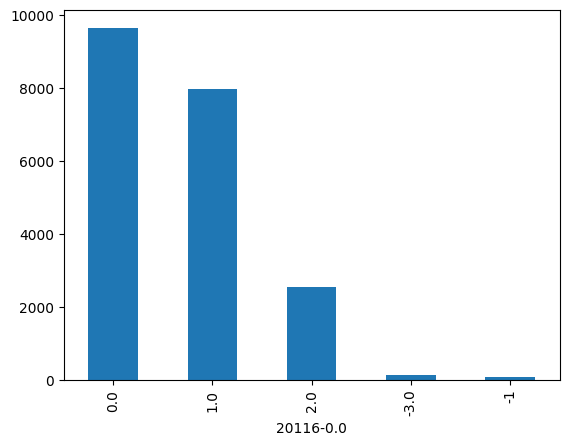

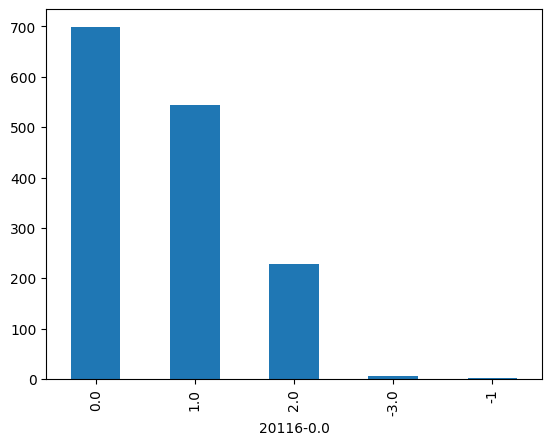

In [62]:
people_with_diabetes_df['20116-0.0'].value_counts().plot(kind='bar')
plt.show()
people_with_pancreatic_cancer_df['20116-0.0'].value_counts().plot(kind='bar')
plt.show()

In [15]:
people_with_diabetes_and_pancreatic_cancer_df = get_people_with_2_diseases(df_filled, diabetes_pattern, pancreatic_cancer_pattern)
people_with_diabetes_and_pancreatic_cancer_df

,eid,41202-0.0,41204-0.0
259788,3598057,E119,C259
35733,1357358,C250,E119
49505,1495072,C250,E119
52013,1520159,C259,E119
122483,2224919,C250,E115
132170,2321809,C250,E119
138710,2387207,C259,E119
151286,2512965,C259,E109
182137,2821479,C250,E119
218560,3185749,C252,E119
